**Exploratory Data Analysis**

I am going to perform EDA on Uber Drives - 2016 Dataset.

Further we will draw some conclusions by observing the trends and patterns of the rides. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time, datetime
import warnings
warnings.filterwarnings('ignore')

**Import Data**

In [4]:
df = pd.read_csv('UberAnalysis.csv',encoding='latin1')

In [5]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.columns = df.columns.str.replace("*","")

In [7]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df.shape

(1156, 7)

In [10]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


**Data Preprocessing**

In [11]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

**Data Visualization**

Visualize null values for each attribute using Heat Map

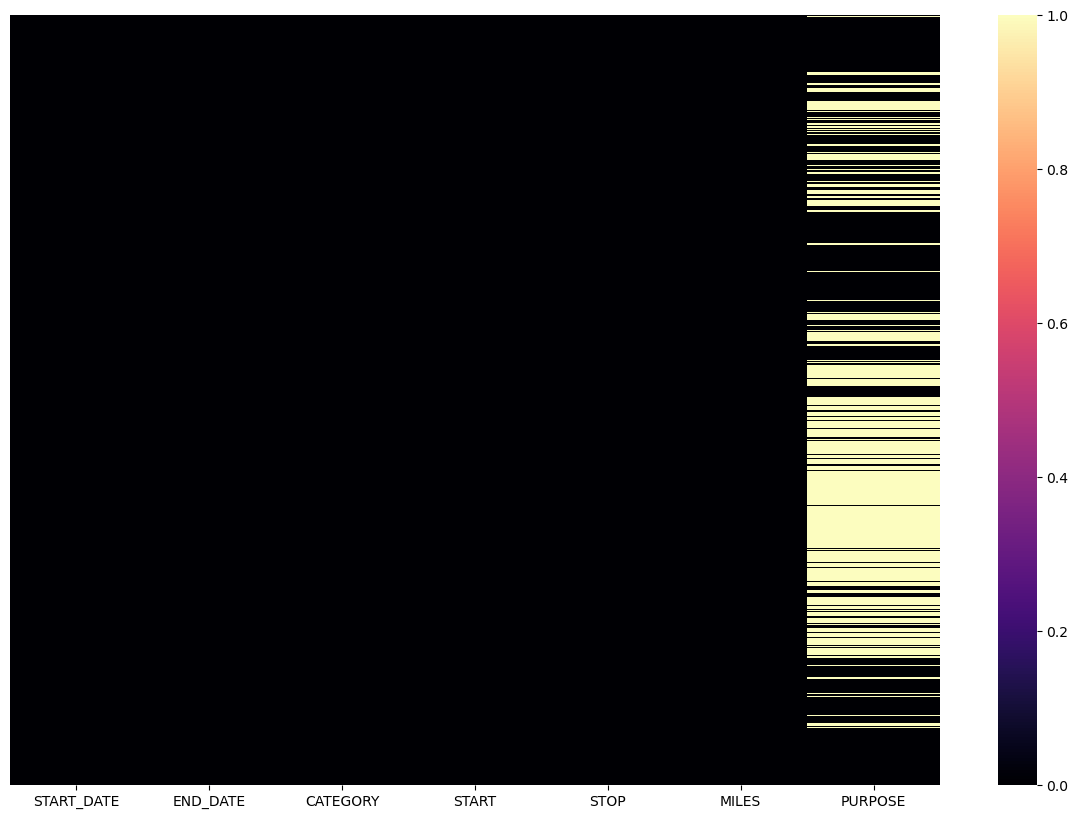

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False)
plt.show()

In [14]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


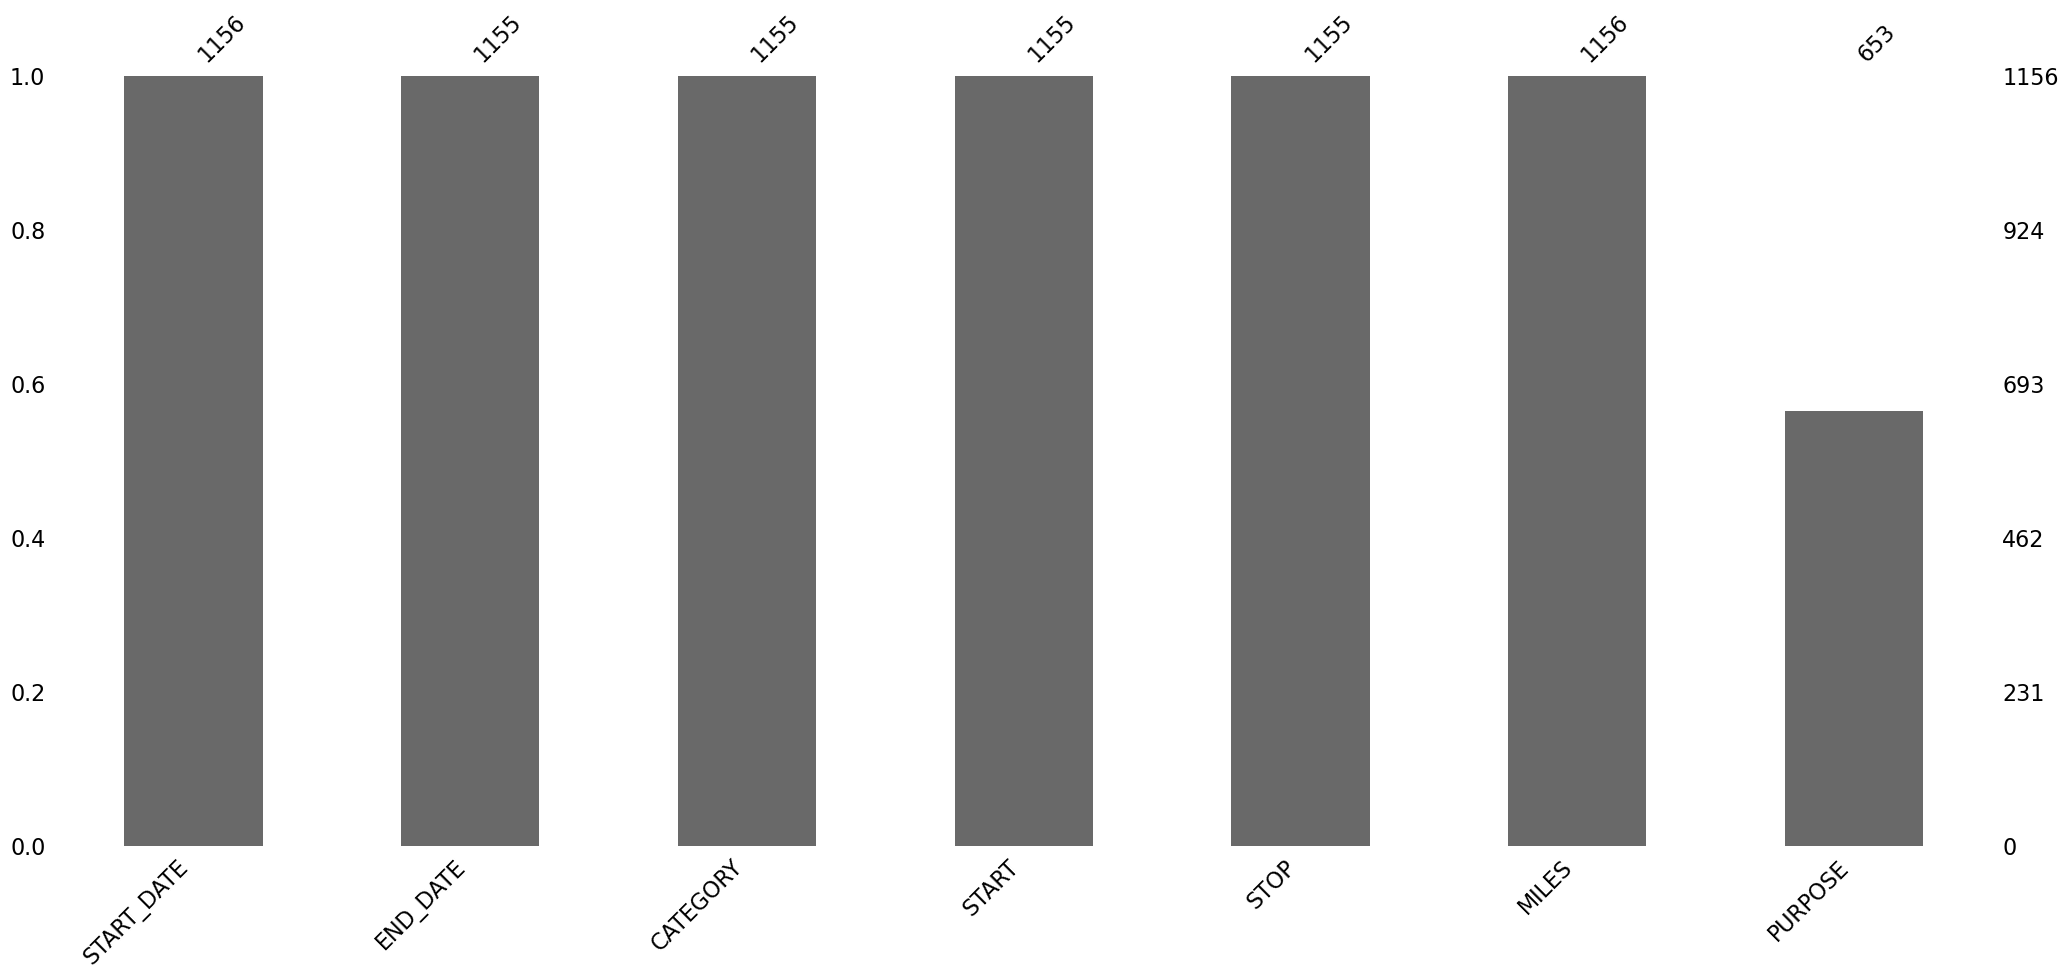

In [18]:
import  missingno as msno
msno.bar(df)
plt.show()

In [19]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [20]:
df.drop(index=1155,axis=0,inplace=True)

In [21]:
df["PURPOSE"].isnull().sum()/len(df)

0.43463203463203465

In [22]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [23]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [24]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [25]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


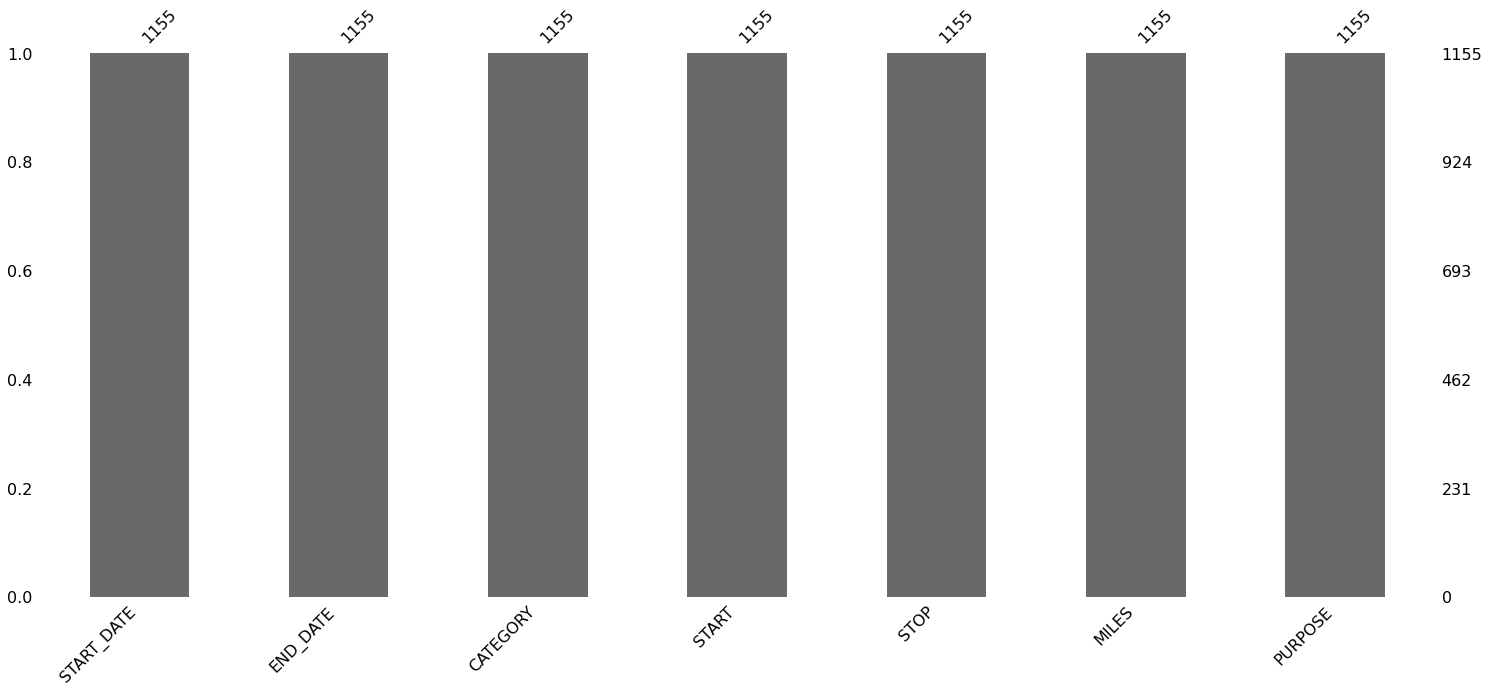

In [18]:
import  missingno as msno
msno.bar(df)
plt.show()

In [26]:
category = pd.crosstab(index=df['CATEGORY'],columns = 'count of travel as per category')
category

col_0,count of travel as per category
CATEGORY,
Business,1078
Personal,77


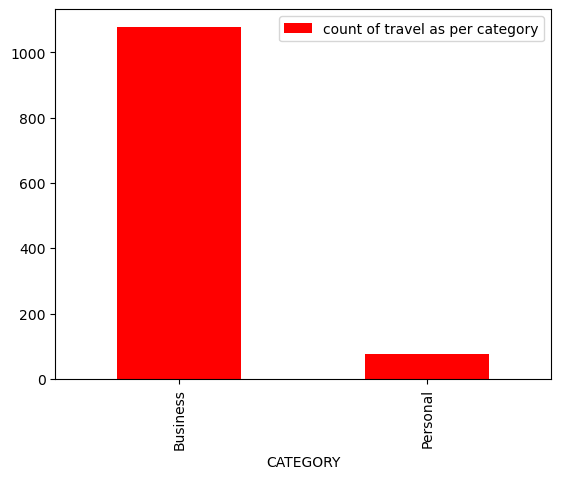

In [27]:
category.plot(kind='bar',color='r')
plt.legend()

Check which places are the start point for majority of the people

In [28]:
start_point=df.START.value_counts()
start_point
print(start_point[start_point>10])

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: count, dtype: int64


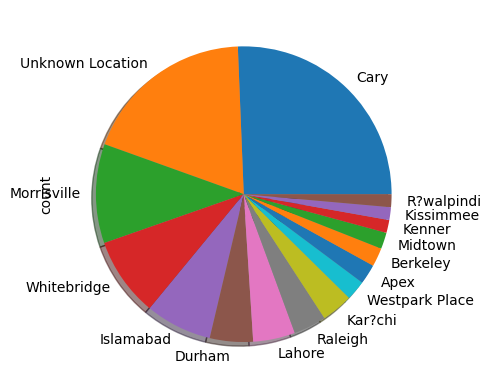

In [30]:
start_point[start_point>10].plot(kind='pie',shadow=True)
plt.show()

Check which places are start point of least people

In [31]:
print(start_point[start_point<=10])

START
New Orleans       10
Emeryville        10
Downtown           9
Edgehill Farms     8
Central            8
                  ..
Florence           1
Ridgeland          1
Daytona Beach      1
Sky Lake           1
Gampaha            1
Name: count, Length: 161, dtype: int64


Check which places are endpoints for majority of the people

In [32]:
stop_point=df.STOP.value_counts()
stop_point
print(stop_point[stop_point>10])

STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: count, dtype: int64


Check which places are endpoints for least people

In [33]:
print(stop_point[stop_point<=10])

STOP
Edgehill Farms       10
New Orleans          10
Kenner               10
Emeryville            9
Central               9
                     ..
Daytona Beach         1
Sand Lake Commons     1
Sky Lake              1
Vista East            1
Ilukwatta             1
Name: count, Length: 173, dtype: int64


EDA - Miles

MILES
9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: count, dtype: int64


<Axes: xlabel='MILES'>

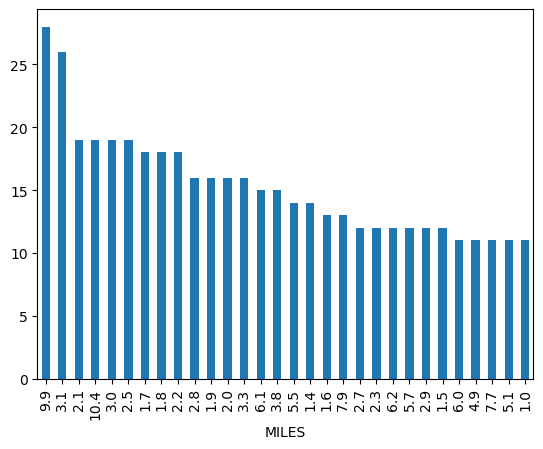

In [34]:
miles = df.MILES.value_counts()
miles
print(miles[miles>10])
miles[miles>10].plot(kind='bar')

In [35]:
print(miles[miles<=10])

MILES
8.4     10
8.7     10
3.9     10
3.6     10
5.3     10
        ..
46.9     1
40.2     1
16.6     1
19.3     1
48.2     1
Name: count, Length: 226, dtype: int64


col_0,count of miles
MILES,
False,840
True,315


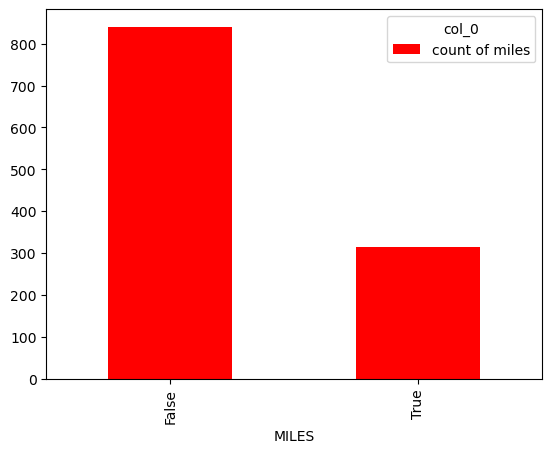

In [36]:
miles = pd.crosstab(index=df['MILES']>10,columns='count of miles')
miles.plot(kind='bar',color='r')
miles

EDA - Purpose

In [39]:
print(df.PURPOSE.value_counts())

PURPOSE
Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: count, dtype: int64


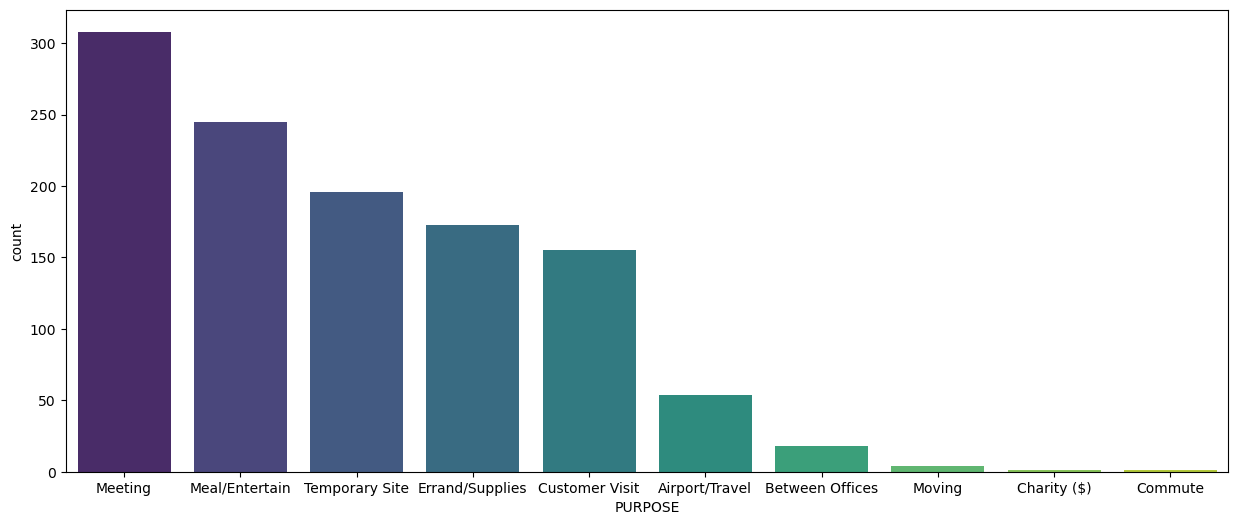

In [42]:
plt.figure(figsize=(15, 6))
sns.countplot(x='PURPOSE', data=df, order=df['PURPOSE'].value_counts().index, palette='viridis')
plt.show()

Calculate Duration of ride.


In [43]:
df['minutes'] = df.END_DATE -df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [44]:
df['minutes']= df['minutes'].dt.total_seconds()/60
df.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


Visualizing relation between Purpose and Duration.

In [45]:
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean().round(1),
             'Min': df.groupby(['PURPOSE'])['MILES'].min(),
             'Max':df.groupby(['PURPOSE'])['MILES'].max()}).reset_index()

,PURPOSE,Mean,Min,Max
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


Box Plot of Miles and Minutes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

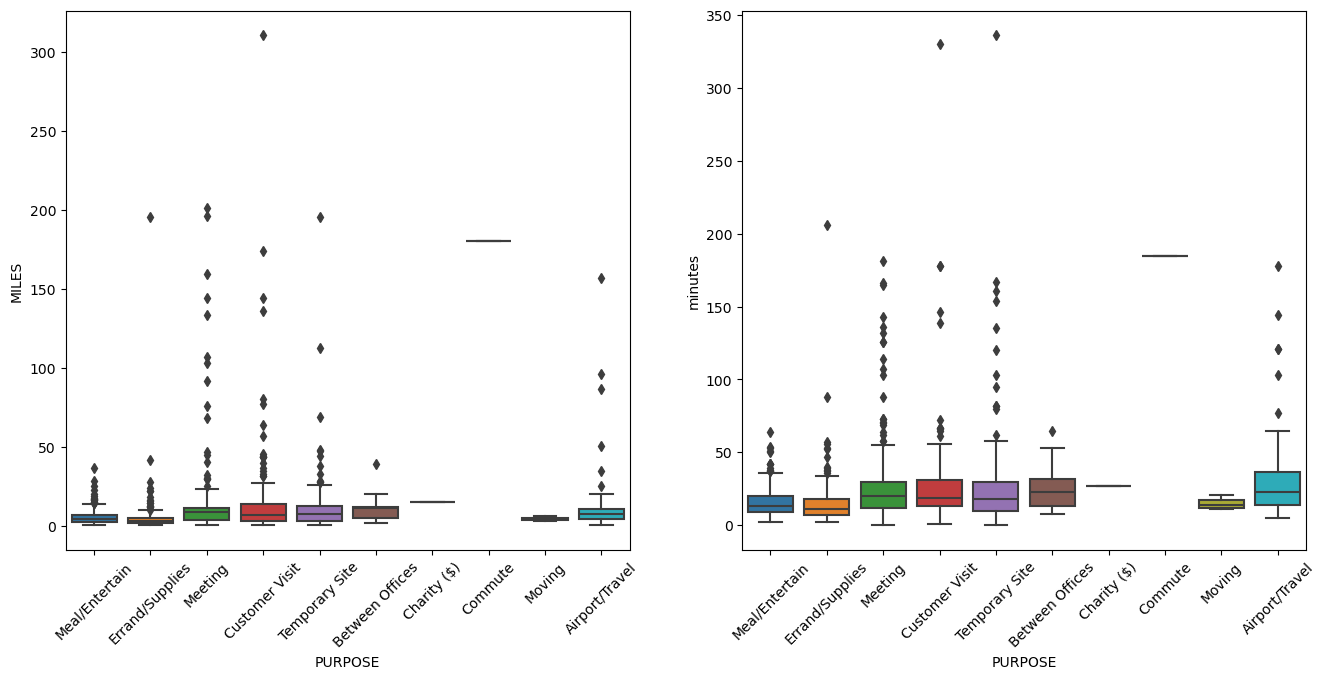

In [46]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes)
plt.xticks(rotation=45)

Vizualize Purpose and minutes.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

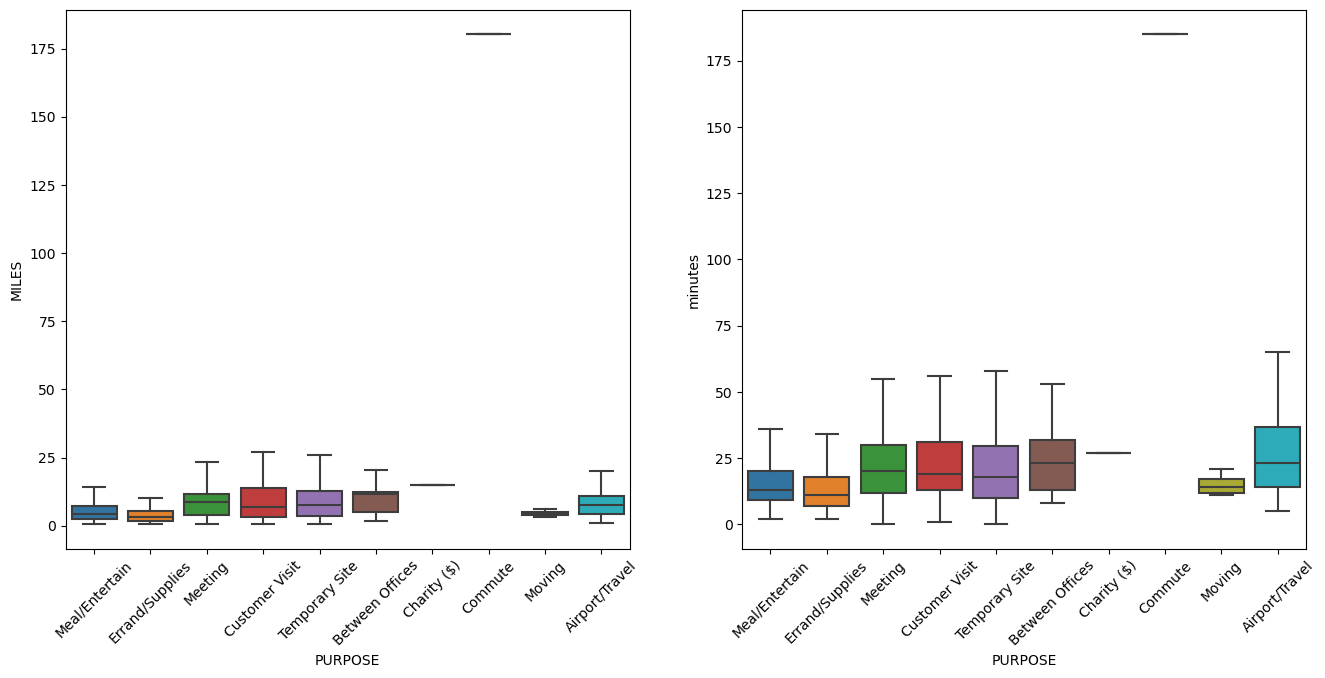

In [47]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.minutes,showfliers=False)
plt.xticks(rotation=45)

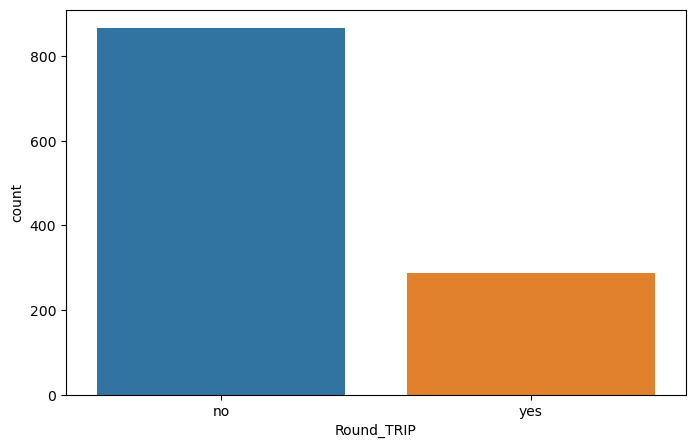

In [50]:
plt.figure(figsize=(8,5))
def round(x):
    if x['START']==x['STOP']:
        return 'yes'
    else:
        return 'no'
df['Round_TRIP'] = df.apply(round,axis=1)
#sns.countplot(df['Round_TRIP'],order = df['Round_TRIP'].value_counts().index)
sns.countplot(x='Round_TRIP', data=df, order=df['Round_TRIP'].value_counts().index)
plt.show()

Check frequency of trips in each months

In [37]:
df['month']= pd.DatetimeIndex(df['START_DATE']).month

In [38]:
dic = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}
df['month'] =df['month'].map(dic)

In [39]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,minutes,Round_TRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,dec


Calculate frequency of ride

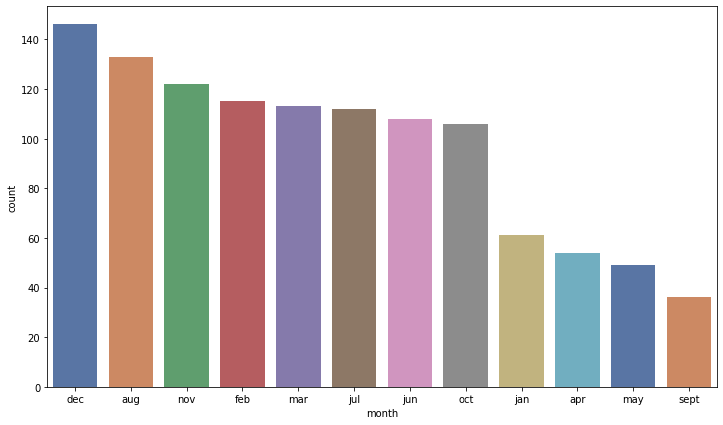

In [40]:
plt.figure(figsize=(12,7))
sns.countplot(df['month'],order = df['month'].value_counts().index,palette='deep')
plt.show()

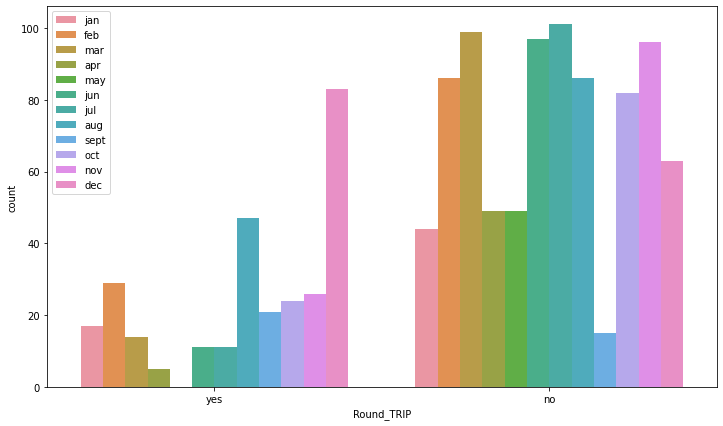

In [41]:
plt.figure(figsize=(12,7))
sns.countplot(df['Round_TRIP'],hue=df['month'])
plt.legend()

Plot Miles w.r.t Minutes

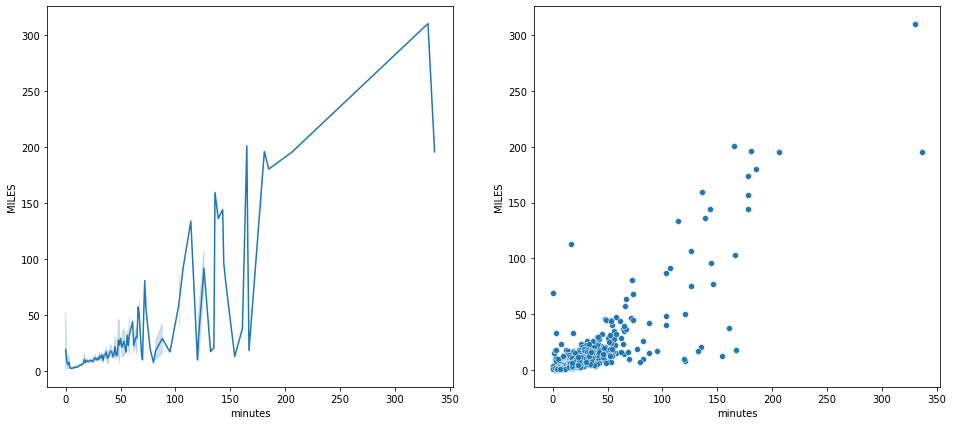

In [42]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df.minutes,y=df.MILES)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df.minutes,y=df.MILES)

Distribution of cab rides based on category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

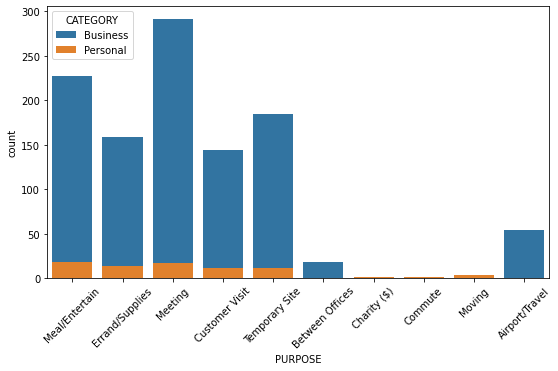

In [43]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)

Frequency of cab rides - start point

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

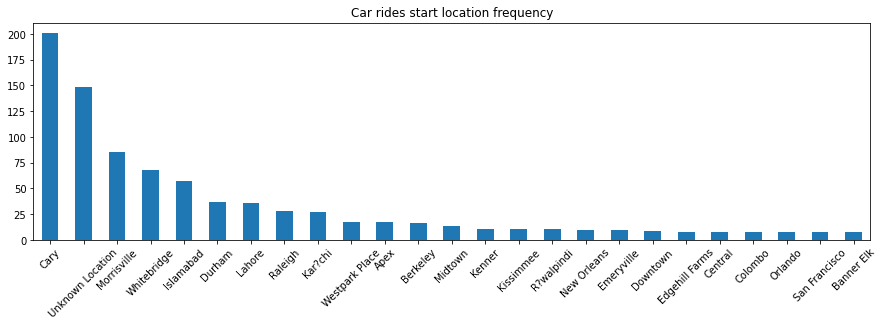

In [44]:
plt.figure(figsize=(15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind='bar')
plt.title('Car rides start location frequency')
plt.xticks(rotation=45)

Frequency of cab rides - stop point

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

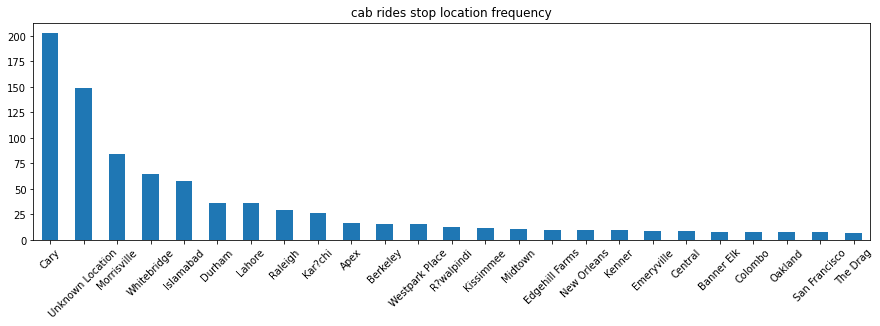

In [45]:
plt.figure(figsize=(15,4))
pd.Series(df['STOP']).value_counts()[:25].plot(kind='bar')
plt.title('cab rides stop location frequency')
plt.xticks(rotation=45)

**Conclusions:**

From the above exploratory data analysis it is observed that:

1.The purpose for which the cabs were mostly used were business.

2.Cabs used for business purpose mostly travelled more distance.

3.Demand for cabs is more in the month of december.

4.Out of all the cities considered the cabs were most used in just five cities.

5.Majority of the cab rides were within the distance 35 km and took about 30 minutes.

6.The cab used for Airport were usually of longer duration.